In [4]:
import os
import re
import numpy as np
import pandas as pd
from collections import Counter
import nltk

In [5]:
with open('/content/wiki.txt', 'r', encoding='ISO-8859-1') as f:
    file = f.readlines()

In [6]:

file[0][:3000]

"'anarchism is political philosophy and movement that is sceptical of authority and rejects all involuntary coercive forms of hierarchy anarchism calls for the abolition of the state which it holds to be undesirable unnecessary and harmful it is usually described alongside libertarian marxism as the libertarian wing libertarian socialism of the socialist movement and as having historical association with anti capitalism and socialism the history of anarchism goes back to prehistory when humans arguably lived in anarchistic societies long before the establishment of formal states realms or empires with the rise of organised hierarchical bodies scepticism toward authority also rose but it was not until the th century that self conscious political movement emerged during the latter half of the th and the first decades of the th century the anarchist movement flourished in most parts of the world and had significant role in workers struggles for emancipation various anarchist schools of th

In [7]:
def process_data(lines):
    """
    Input:
        A file_name which is found in your current directory. You just have to read it in.
    Output:
        words: a list containing all the words in the corpus (text file you read) in lower case.
    """
    words = []
    for line in lines:
        line = line.strip().lower()
        word = re.findall(r'\w+', line)
        words.extend(word)

    return words

In [8]:
word_l = process_data(file)
vocab = set(word_l)
print(f"The first ten words in the text are: \n{word_l[0:10]}")
print(f"There are {len(vocab)} unique words in the vocabulary.")

The first ten words in the text are: 
['anarchism', 'is', 'political', 'philosophy', 'and', 'movement', 'that', 'is', 'sceptical', 'of']
There are 255 unique words in the vocabulary.


In [9]:
def find_wrong_word(sent, vocab):
    wrong_words = []
    sent = sent.strip().lower().split(" ")
    for word in sent:
        if word not in vocab:
            wrong_words.append(word)
    return wrong_words

In [10]:
find_wrong_word('selfy consiscious political movement', vocab)

['selfy', 'consiscious']

In [11]:
def delete_letter(word, verbose=False):
    '''
    Input:
        word: the string/word for which you will generate all possible words
                in the vocabulary which have 1 missing character
    Output:
        delete_l: a list of all possible strings obtained by deleting 1 character from word
    '''

    delete_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    delete_l = [s[0]+s[1][1:] for s in split_l]
    if verbose: print(f"input word : {word} \nsplit_l = {split_l}, \ndelete_l = {delete_l}")

    return delete_l

In [12]:
delete_word_l = delete_letter(word="cans",
                        verbose=True)

input word : cans 
split_l = [('', 'cans'), ('c', 'ans'), ('ca', 'ns'), ('can', 's')], 
delete_l = ['ans', 'cns', 'cas', 'can']


In [13]:
def switch_letter(word, verbose=False):
    '''
    Input:
        word: input string
     Output:
        switches: a list of all possible strings with one adjacent charater switched
    '''

    switch_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1])>2:
            temp = s[0] + s[1][1] + s[1][0] + s[1][2:]
        elif len(s[1]) == 2:
            temp = s[0] + s[1][1] + s[1][0]
        elif len(s[1]) == 1:
            continue
        switch_l.append(temp)

    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nswitch_l = {switch_l}")

    return switch_l

In [14]:
switch_word_l = switch_letter(word="eta",
                         verbose=True)

Input word = eta 
split_l = [('', 'eta'), ('e', 'ta'), ('et', 'a')] 
switch_l = ['tea', 'eat']


In [15]:
def replace_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word
    Output:
        replaces: a list of all possible strings where we replaced one letter from the original word.
    '''

    letters = 'abcdefghijklmnopqrstuvwxyz'
    replace_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word))]
    for s in split_l:
        if len(s[1]) == 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l
                    replace_l.append(s[0]+temp)
        elif len(s) > 1:
            for l in letters:
                if l != s[1][0]:
                    temp = l + s[1][1:]
                    replace_l.append(s[0]+temp)

    replace_set = set(replace_l)

    # turn the set back into a list and sort it, for easier viewing
    replace_l = sorted(list(replace_set))

    if verbose: print(f"Input word = {word} \nsplit_l = {split_l} \nreplace_l {replace_l}")

    return replace_l

In [16]:
replace_l = replace_letter(word='can',
                              verbose=True)

Input word = can 
split_l = [('', 'can'), ('c', 'an'), ('ca', 'n')] 
replace_l ['aan', 'ban', 'caa', 'cab', 'cac', 'cad', 'cae', 'caf', 'cag', 'cah', 'cai', 'caj', 'cak', 'cal', 'cam', 'cao', 'cap', 'caq', 'car', 'cas', 'cat', 'cau', 'cav', 'caw', 'cax', 'cay', 'caz', 'cbn', 'ccn', 'cdn', 'cen', 'cfn', 'cgn', 'chn', 'cin', 'cjn', 'ckn', 'cln', 'cmn', 'cnn', 'con', 'cpn', 'cqn', 'crn', 'csn', 'ctn', 'cun', 'cvn', 'cwn', 'cxn', 'cyn', 'czn', 'dan', 'ean', 'fan', 'gan', 'han', 'ian', 'jan', 'kan', 'lan', 'man', 'nan', 'oan', 'pan', 'qan', 'ran', 'san', 'tan', 'uan', 'van', 'wan', 'xan', 'yan', 'zan']


In [17]:
print(f"Number of outputs of switch_letter('at') is {len(switch_letter('fate'))}")

Number of outputs of switch_letter('at') is 3


In [18]:
def insert_letter(word, verbose=False):
    '''
    Input:
        word: the input string/word
    Output:
        inserts: a set of all possible strings with one new letter inserted at every offset
    '''
    letters = 'abcdefghijklmnopqrstuvwxyz'
    insert_l = []
    split_l = []
    split_l = [(word[:i], word[i:]) for i in range(len(word)+1)]
    for s in split_l:
        for l in letters:
            insert_l.append(s[0]+l+s[1])

    if verbose: print(f"Input word {word} \nsplit_l = {split_l} \ninsert_l = {insert_l}")

    return insert_l

In [19]:
insert_l = insert_letter('at', True)
print(f"Number of strings output by insert_letter('at') is {len(insert_l)}")

Input word at 
split_l = [('', 'at'), ('a', 't'), ('at', '')] 
insert_l = ['aat', 'bat', 'cat', 'dat', 'eat', 'fat', 'gat', 'hat', 'iat', 'jat', 'kat', 'lat', 'mat', 'nat', 'oat', 'pat', 'qat', 'rat', 'sat', 'tat', 'uat', 'vat', 'wat', 'xat', 'yat', 'zat', 'aat', 'abt', 'act', 'adt', 'aet', 'aft', 'agt', 'aht', 'ait', 'ajt', 'akt', 'alt', 'amt', 'ant', 'aot', 'apt', 'aqt', 'art', 'ast', 'att', 'aut', 'avt', 'awt', 'axt', 'ayt', 'azt', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz']
Number of strings output by insert_letter('at') is 78


In [20]:
def edit_one_letter(word, allow_switches = True):
    """
    Input:
        word: the string/word for which we will generate all possible wordsthat are one edit away.
    Output:
        edit_one_set: a set of words with one possible edit. Please return a set. and not a list.
    """

    edit_one_set = set()
    insert_l = insert_letter(word)
    delete_l = delete_letter(word)
    replace_l = replace_letter(word)
    switch_l = switch_letter(word)

    if allow_switches:
        ans = insert_l + delete_l + replace_l + switch_l
    else:
        ans = insert_l + delete_l + replace_l

    edit_one_set = set(ans)

    return edit_one_set

In [21]:
tmp_word = "at"
tmp_edit_one_set = edit_one_letter(tmp_word)
# turn this into a list to sort it, in order to view it
tmp_edit_one_l = sorted(list(tmp_edit_one_set))

print(f"input word : {tmp_word} \nedit_one_l \n{tmp_edit_one_l}\n")
#print(f"The type of the returned object should be a set {type(tmp_edit_one_set)}")
print(f"Number of outputs from edit_one_letter('at') is {len(edit_one_letter('at'))}")

input word : at 
edit_one_l 
['a', 'aa', 'aat', 'ab', 'abt', 'ac', 'act', 'ad', 'adt', 'ae', 'aet', 'af', 'aft', 'ag', 'agt', 'ah', 'aht', 'ai', 'ait', 'aj', 'ajt', 'ak', 'akt', 'al', 'alt', 'am', 'amt', 'an', 'ant', 'ao', 'aot', 'ap', 'apt', 'aq', 'aqt', 'ar', 'art', 'as', 'ast', 'ata', 'atb', 'atc', 'atd', 'ate', 'atf', 'atg', 'ath', 'ati', 'atj', 'atk', 'atl', 'atm', 'atn', 'ato', 'atp', 'atq', 'atr', 'ats', 'att', 'atu', 'atv', 'atw', 'atx', 'aty', 'atz', 'au', 'aut', 'av', 'avt', 'aw', 'awt', 'ax', 'axt', 'ay', 'ayt', 'az', 'azt', 'bat', 'bt', 'cat', 'ct', 'dat', 'dt', 'eat', 'et', 'fat', 'ft', 'gat', 'gt', 'hat', 'ht', 'iat', 'it', 'jat', 'jt', 'kat', 'kt', 'lat', 'lt', 'mat', 'mt', 'nat', 'nt', 'oat', 'ot', 'pat', 'pt', 'qat', 'qt', 'rat', 'rt', 'sat', 'st', 't', 'ta', 'tat', 'tt', 'uat', 'ut', 'vat', 'vt', 'wat', 'wt', 'xat', 'xt', 'yat', 'yt', 'zat', 'zt']

Number of outputs from edit_one_letter('at') is 129


In [22]:
def edit_two_letters(word, allow_switches = True):
    '''
    Input:
        word: the input string/word
    Output:
        edit_two_set: a set of strings with all possible two edits
    '''

    edit_two_set = set()
    one_edit = edit_one_letter(word)
    ans = []
    for w in one_edit:
        ans.append(w)
        ans.extend(edit_one_letter(w))

    edit_two_set = set(ans)

    return edit_two_set

In [23]:
tmp_edit_two_set = edit_two_letters("a")
tmp_edit_two_l = sorted(list(tmp_edit_two_set))
print(f"Number of strings with edit distance of two: {len(tmp_edit_two_l)}")
print(f"First 10 strings {tmp_edit_two_l[:10]}")
print(f"Last 10 strings {tmp_edit_two_l[-10:]}")
print(f"The data type of the returned object should be a set {type(tmp_edit_two_set)}")
print(f"Number of strings that are 2 edit distances from 'at' is {len(edit_two_letters('at'))}")

Number of strings with edit distance of two: 2654
First 10 strings ['', 'a', 'aa', 'aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag']
Last 10 strings ['zv', 'zva', 'zw', 'zwa', 'zx', 'zxa', 'zy', 'zya', 'zz', 'zza']
The data type of the returned object should be a set <class 'set'>
Number of strings that are 2 edit distances from 'at' is 7154


In [24]:
def get_count(word_l):
    '''
    Input:
        word_l: a set of words representing the corpus.
    Output:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    '''
    word_count_dict = {}
    word_count_dict = Counter(word_l)
    return word_count_dict

In [25]:
word_count_dict = get_count(word_l)
print(f"There are {len(word_count_dict)} key values pairs")
print(f"The count for the word 'thee' is {word_count_dict.get('thee',0)}")

There are 255 key values pairs
The count for the word 'thee' is 0


In [26]:
def get_probs(word_count_dict):
    '''
    Input:
        word_count_dict: The wordcount dictionary where key is the word and value is its frequency.
    Output:
        probs: A dictionary where keys are the words and the values are the probability that a word will occur.
    '''
    probs = {}
    total = 1
    for word in word_count_dict.keys():
        total = total + word_count_dict[word]

    for word in word_count_dict.keys():
        probs[word] = word_count_dict[word]/total
    return probs

In [27]:
probs = get_probs(word_count_dict)
print(f"Length of probs is {len(probs)}")


Length of probs is 255


In [28]:
prob_df = pd.DataFrame({'word':probs.keys(), 'probability':probs.values()}).sort_values(by='probability', ascending=False)
prob_df.sample(5)

,word,probability
106,several,0.002132
95,emancipation,0.002132
70,rose,0.002132
142,are,0.002132
125,employs,0.002132


<Axes: xlabel='word'>

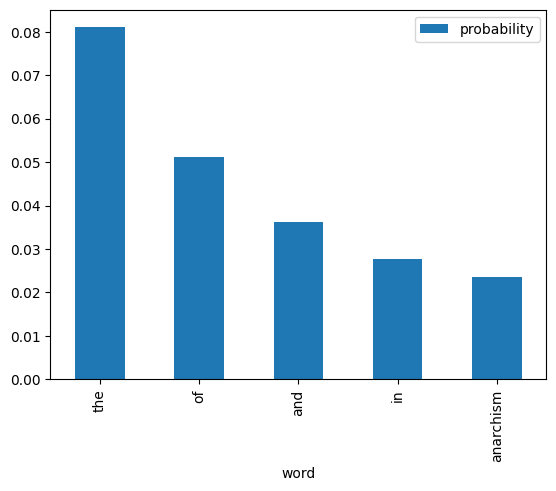

In [29]:
prob_df.head().plot.bar(x='word', y='probability')

In [30]:
def get_corrections(word, probs, vocab, n=2, verbose = False):
    '''
    Input:
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output:
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''

    suggestions = []
    n_best = []


    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)

    best_words = {}

    for s in suggestions:
        best_words[s] = probs[s]

    best_words = sorted(best_words.items(), key=lambda x: x[1], reverse=True)

    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [31]:
def get_correct_word(word, vocab, probs, n):
    corrections = get_corrections(word, probs, vocab, n, verbose=False)
#    print(corrections)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        #print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

In [32]:
get_correct_word('annd', vocab, probs, 100)

'and'

In [33]:
def autocorrect(sentence, vocab, probs):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    #print(wrong_words)
    correct_words = []
    for word in sentence.strip().lower().split(" "):
        if word in wrong_words:
            correct_word = get_correct_word(word, vocab, probs, 15)
            #print(word, correct_word)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

In [34]:
autocorrect("he is goinng home", vocab, probs)

Input sentence :  he is goinng home
Wrong words :  ['he', 'goinng', 'home']
Output Sentence :  The is goinng have


In [35]:
autocorrect("honsty is the best pooliccy", vocab, probs)

Input sentence :  honsty is the best pooliccy
Wrong words :  ['honsty', 'best', 'pooliccy']
Output Sentence :  Honsty is the be pooliccy


In [36]:
autocorrect("life is a diink annd lve is a druug", vocab, probs)

Input sentence :  life is a diink annd lve is a druug
Wrong words :  ['life', 'a', 'diink', 'annd', 'lve', 'a', 'druug']
Output Sentence :  Like is and diink and the is and druug


In [37]:
def count_n_grams(data, n, start_token='<s>', end_token = '<e>'):

    # Initialize dictionary of n-grams and their counts
    n_grams = {}


    for sentence in data:

        # prepend start token n times, and  append <e> one time
        sentence = [start_token]*n + sentence + [end_token]
        sentence = tuple(sentence)

        for i in range(len(sentence)-n):
            n_gram = sentence[i:i+n]
            if n_gram in n_grams.keys():
                n_grams[n_gram] += 1
            else:
                n_grams[n_gram] = 1
    return n_grams

In [38]:
def split_to_sentences(data):
    #sentences = data.split("\n")
    sentences = [s.strip() for s in data]
    sentences = [s for s in sentences if len(s) > 0]
    return sentences

def tokenize_sentences(sentences):
    tokenized_sentences = []
    for sentence in sentences:
        sentence = sentence.lower()
        tokenized = nltk.tokenize.word_tokenize(sentence)
        tokenized_sentences.append(tokenized)
    return tokenized_sentences


def get_tokenized_data(data):
    sentences = split_to_sentences(data)
    tokenized_sentences = tokenize_sentences(sentences)
    return tokenized_sentences


In [40]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [42]:
tokenized_data = get_tokenized_data(file)
bigram_counts = count_n_grams(tokenized_data, 2)

In [43]:
def get_bigram_prob(word, prev_word, bigram_counts, factor):
    key = tuple([prev_word, word])
    #print(key)

    ksum = 0
    occ = 0
    for k, v in bigram_counts.items():
        if k[0] == prev_word:
            ksum = ksum + v
            occ = occ + 1
    #print(ksum)
    #print(occ)

    count = 0
    if key in bigram_counts.keys():
        count = bigram_counts[key]
    #print(type(occ))

    smooth_count = count + factor
    smooth_occ = ksum + occ*factor
    probability = smooth_count / smooth_occ
    #print(probability)
    return probability

In [44]:
get_bigram_prob('is', 'that', bigram_counts, 1)

0.25

In [45]:
def get_corrections_bigram(word, prev_word, probs, vocab, bigram_counts, unigram_weight=0.3, bigram_weight=0.7, n=5, verbose = False):
    '''
    Input:
        word: a user entered string to check for suggestions
        probs: a dictionary that maps each word to its probability in the corpus
        vocab: a set containing all the vocabulary
        n: number of possible word corrections you want returned in the dictionary
    Output:
        n_best: a list of tuples with the most probable n corrected words and their probabilities.
    '''

    suggestions = []
    n_best = []


    if word in probs.keys():
        suggestions.append(word)
    for w in edit_one_letter(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)
    for w in edit_two_letters(word):
        if len(suggestions) == n:
            break
        if w in probs.keys():
            suggestions.append(w)


    best_words = {}

    for s in suggestions:
        #best_words[s] = probs[s]
        unigram_prob = probs[s]
        #print(s)
        try:
            bigram_prob = get_bigram_prob(s, prev_word, bigram_counts, 1)
        except:
            bigram_prob = 0.0000000000000000001

        final_score = unigram_weight*unigram_prob + bigram_weight*bigram_prob

        best_words[s] = final_score

    best_words = sorted(best_words.items(), key=lambda x: x[1], reverse=True)

    n_best = best_words

    if verbose: print("entered word = ", word, "\nsuggestions = ", suggestions)

    return n_best

In [46]:
def get_correct_word_bigram(word, prev_word, probs, vocab, bigram_counts, unigram_weight, bigram_weight, n):
    corrections = get_corrections_bigram(word, prev_word, probs, vocab,
                                         bigram_counts, unigram_weight, bigram_weight, n, verbose=False)
    #print(corrections)
    if len(corrections) == 0:
        return word

    final_word = corrections[0][0]
    final_prob = corrections[0][1]
    for i, word_prob in enumerate(corrections):
        #print(f"word {i}: {word_prob[0]}, probability {word_prob[1]:.6f}")
        if word_prob[1] > final_prob:
            final_word = word_prob[0]
            final_prob = word_prob[1]
    return final_word

In [47]:
def autocorrect_bigram(sentence, vocab, probs, bigram_counts):
    print("Input sentence : ", sentence)
    wrong_words = find_wrong_word(sentence, vocab)
    print("Wrong words : ", wrong_words)
    #print(wrong_words)
    correct_words = []
    word_list = sentence.strip().lower().split(" ")
    for i, word in enumerate(word_list):
        #print(i, word)

        #### Previous word
        if i==0:
            prev_word = '<s>'
        else:
            prev_word = word_list[i-1]

        if word in wrong_words:
            correct_word = get_correct_word_bigram(word, prev_word, probs, vocab, bigram_counts, 0.3, 0.7, 10)
            #print(word, correct_word)
            word = correct_word
        correct_words.append(word)
    print("Output Sentence : ", " ".join(correct_words).capitalize())

In [50]:
autocorrect_bigram('anarchsim is poliitcal philosophy and movement ', vocab, probs, bigram_counts)

Input sentence :  anarchsim is poliitcal philosophy and movement 
Wrong words :  ['anarchsim', 'poliitcal']
Output Sentence :  Anarchism is political philosophy and movement
